In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
data = sns.load_dataset("iris")
data = np.array(data)[:,:-1]
data = data.astype('float')

In [6]:
def k_medoids(data,k):
    #Initialize
    med_index = np.random.choice(data.shape[0],k)
    non_med_index = np.array([i for i in range(data.shape[0]) if i not in med_index])
    med = data[med_index].astype('float')
    non_med = data[non_med_index].astype('float')

    #Assign points to medoids
    dist = np.sqrt(-2 * np.dot(non_med,med.T) + np.sum(med**2,axis=1) + np.sum(non_med**2, axis=1)[:, np.newaxis])
    assigned = np.argmin(dist,axis = 1).reshape(non_med.shape[0],1).astype('int')
    cost = np.sum(np.min(dist,axis = 1))

    #Repeating Clustering
    for m in range(med.shape[0]):
        for o in range(non_med.shape[0]):
            prev = cost

            #Swap
            temp = med[m].copy()
            med[m] = non_med[o].copy()
            non_med[o] = temp.copy()

            #Update Cost
            dist = np.sqrt(-2 * np.dot(non_med,med.T) + np.sum(med**2,axis=1) + np.sum(non_med**2, axis=1)[:, np.newaxis])
            assigned = np.argmin(dist,axis = 1).reshape(non_med.shape[0],1).astype('int')
            cost = np.sum(np.min(dist,axis = 1))

            #Check if cost decreases
            if cost > prev:
                temp = med[m].copy()
                med[m] = non_med[o].copy()
                non_med[o] = temp.copy()
                cost = prev
    return cost

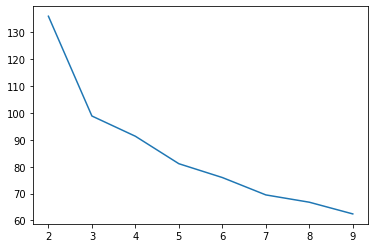

In [10]:
noc = []
err = []
for k in range(2,10):
    error = k_medoids(data,k)
    noc.append(k)
    err.append(error)
sns.lineplot(x=noc,y=err)